In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')

# Introducción

## Series con estacionalidad

En una serie de tiempo, **estacionalidad** es un patrón regular de cambios que se repite cada $s$ períodos.

Por ejemplo, una serie mensual es estacional si valores altos tienden a ocurrir en meses particulares y los valores bajos tienen a ocurrir en otros meses particulares. En este caso $s=12$. Para series trimestrales estacionales, $s=4$.

El primer paso para detectar si una serie es estacional es simplemente graficarla.

```{warning}
¡Estacionalidad no es lo mismo que estacionariedad!
```


{{ empieza_ejemplo }} Pasajeros del aeropuerto Juan Santamaría{{ fin_titulo_ejemplo }}
- Datos-ARESEP-Pasajeros-por-aeropuerto.xlsx

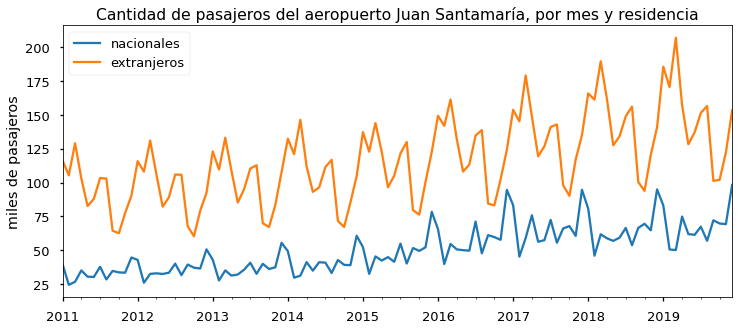

In [2]:
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
         'Julio', 'Agosto', 'Setiembre', 'Octubre', 'Noviembre', 'Diciembre']
mesescorto = [x[:3] for x in meses]
meses2 = {mes: i for i, mes in enumerate(meses, start=1)}

# Leer y limpiar datos
FILENAME = "https://github.com/randall-romero/econometria/raw/master/data/Datos-ARESEP-Pasajeros-por-aeropuerto.csv"
SJO = pd.read_csv(FILENAME)
SJO.query('Aeropuerto =="Aeropuerto Internacional Juan Santamaría"', inplace=True)
SJO.replace({'Mes':meses2}, inplace=True)
SJO.sort_values(['Año','Mes'], inplace=True)
SJO.index = pd.period_range(start=f"{SJO['Año'].iloc[0]}-{SJO['Mes'].iloc[0]}", periods=SJO.shape[0], freq='M')
SJO.drop(['Aeropuerto', 'Mes', 'Año', 'Cantidad En Tránsito', 'Cantidad Exentos','Total Pasajeros'], axis=1,inplace=True)
SJO.rename(columns={'Cantidad Nacionales':'nacionales', 'Cantidad Extrajeros':'extranjeros'}, inplace=True)


# Gráficos de estacionalidad
sjodatos = SJO/1000

fig, ax = plt.subplots(figsize=[12,5])
sjodatos.plot(ax=ax)
ax.set(xlabel='',
       ylabel='miles de pasajeros',
       title='Cantidad de pasajeros del aeropuerto Juan Santamaría, por mes y residencia');

Un gráfico estacional es similar a un gráfico de tiempo, excepto que los datos se mapean contra la “estación” en la cual se observan.

Permiten percibir el patrón estacional subyacente más claramente.
Es especialmente útil para identificar años en que cambian los patrones.

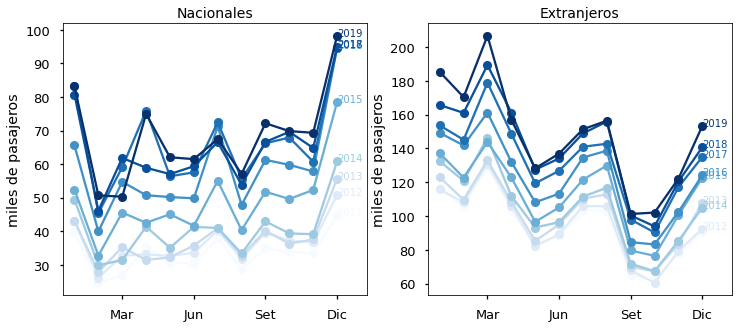

In [3]:
sjodatos.index = pd.MultiIndex.from_arrays([sjodatos.index.year, sjodatos.index.month])
sjodatoscuadro = sjodatos.unstack()


# Guardar datos filtrados para próximos cuadernos
#sjodatos.to_pickle("datos/SJO-pasajeros.pickle")


fig, axs= plt.subplots(1,2, figsize=[12,5], sharex=True)

sjodatoscuadro['nacionales'].T.plot(ax=axs[0], cmap = 'Blues', marker='o', legend=False);
sjodatoscuadro['extranjeros'].T.plot(ax=axs[1], cmap = 'Blues', marker='o', legend=False);


for ax,tlt in zip(axs, ['Nacionales', 'Extranjeros']):
    ax.set(xlabel='',
           xticks=[3,6,9,12],
           xticklabels = mesescorto[2::3],
           xlim=[0.5,13.25],
           ylabel='miles de pasajeros')
    ax.grid(False, axis='y')
    ax.set_title(tlt, size=14)
    colores = [aa.get_color() for aa in ax.lines]
    for (a,v), cc in zip(sjodatoscuadro[tlt.lower()].T.loc[12].iteritems(), colores):
        ax.annotate(str(a), [12, v], color=cc)

La temporada “alta” de viajes de extranjeros ocurre entre enero y abril, mientras que la “baja” sucede en septiembre-octubre.

La temporada “alta” de viajes de nacionales es en diciembre y enero, la baja en “febrero”.

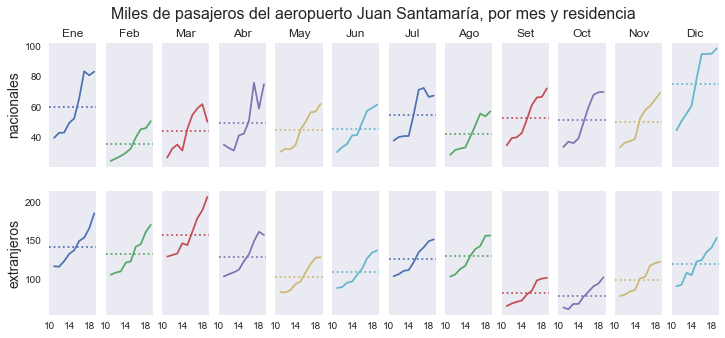

In [4]:
promediomensual = sjodatoscuadro.mean().unstack().T

plt.style.use('seaborn')
fig, axs= plt.subplots(2,12, figsize=[12,5], sharex=True, sharey='row')

sjodatoscuadro['nacionales'].plot(subplots=True, ax=axs[0],legend=False);
for ax, (mes, mean) in zip(axs[0], promediomensual['nacionales'].iteritems()):
    ax.set_title(mesescorto[mes-1])
    color = ax.lines[0].get_color()
    ax.axhline(mean, color=color, ls=':')
    ax.grid(False)


sjodatoscuadro['extranjeros'].plot(subplots=True, ax=axs[1],legend=False);
for ax, (mes, mean) in zip(axs[1], promediomensual['extranjeros'].iteritems()):
    color = ax.lines[0].get_color()
    ax.axhline(mean, color=color, ls=':')
    ax.grid(False)    
    ax.set_xlabel('')

axs[0,0].set_xticks([2010,2014,2018])
axs[0,0].set_xticklabels(['10','14','18'])


axs[0,0].set_ylabel('nacionales', size=14)
axs[1,0].set_ylabel('extranjeros', size=14)

fig.suptitle('Miles de pasajeros del aeropuerto Juan Santamaría, por mes y residencia', size=16);

{{ termina_ejemplo }}